# Multi-Label Text Classification for Stack Overflow Tag Prediction

Multi-class classification means a classification task with more than two classes; each label are mutually exclusive. The classification makes the assumption that each sample is assigned to one and only one label.

On the other hand, Multi-label classification assigns to each sample a set of target labels. This can be thought as predicting properties of a data-point that are not mutually exclusive, such as Tim Horton are often categorized as both bakery and coffee shop.

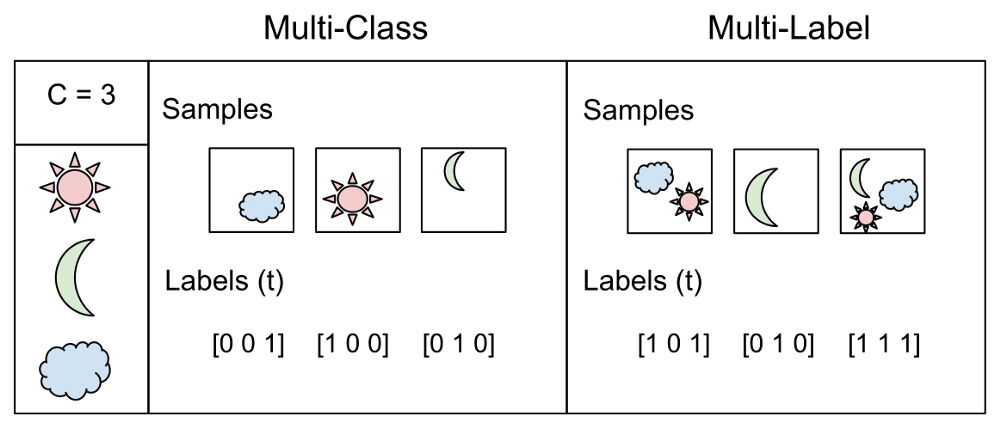

Text Cleaning Package: https://github.com/laxmimerit/preprocess_kgptalkie

## Load Dataset 

dataset: https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/stackoverflow.csv

In [3]:
import pandas as pd
import numpy as np

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer

In [5]:
# df = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/stackoverflow.csv', index_col = 0)
df = pd.read_csv('stackoverflow.csv', index_col = 0)

In [6]:
df.head()

,Text,Tags
2,aspnet site maps has anyone got experience cre...,"['sql', 'asp.net']"
4,adding scripting functionality to net applicat...,"['c#', '.net']"
5,should i use nested classes in this case i am ...,['c++']
6,homegrown consumption of web services i have b...,['.net']
8,automatically update version number i would li...,['c#']


In [7]:
type(df.iloc[0]['Tags'])

str

In [8]:
import ast

In [9]:
df.iloc[0]['Tags']

"['sql', 'asp.net']"

In [10]:
ast.literal_eval(df.iloc[0]['Tags'])

['sql', 'asp.net']

In [11]:
df['Tags'] = df['Tags'].apply(lambda x: ast.literal_eval(x))

In [12]:
df.iloc[0]['Tags']

['sql', 'asp.net']

In [13]:
df.head()

,Text,Tags
2,aspnet site maps has anyone got experience cre...,"[sql, asp.net]"
4,adding scripting functionality to net applicat...,"[c#, .net]"
5,should i use nested classes in this case i am ...,[c++]
6,homegrown consumption of web services i have b...,[.net]
8,automatically update version number i would li...,[c#]


In [14]:
multilabel = MultiLabelBinarizer()
y = multilabel.fit_transform(df['Tags'])

In [16]:
y.shape

(48976, 20)

In [14]:
classes = multilabel.classes_

In [15]:
classes

array(['.net', 'android', 'asp.net', 'c', 'c#', 'c++', 'css', 'html',
       'ios', 'iphone', 'java', 'javascript', 'jquery', 'mysql',
       'objective-c', 'php', 'python', 'ruby', 'ruby-on-rails', 'sql'],
      dtype=object)

In [16]:
pd.DataFrame(y, columns=classes)

,.net,android,asp.net,c,c#,c++,css,html,ios,iphone,java,javascript,jquery,mysql,objective-c,php,python,ruby,ruby-on-rails,sql
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48971,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48972,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48973,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
48974,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [17]:
tfidf = TfidfVectorizer(analyzer='word', max_features = 1000, ngram_range = (1,3), stop_words='english')

In [18]:
X = tfidf.fit_transform(df['Text'])

In [19]:
X

<48976x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1239765 stored elements in Compressed Sparse Row format>

In [20]:
tfidf.vocabulary_

{'aspnet': 75,
 'site': 801,
 'got': 392,
 'creating': 221,
 'default': 239,
 'xml': 998,
 'file': 347,
 'working': 988,
 'properly': 675,
 'menu': 554,
 'need': 576,
 'way': 975,
 'users': 942,
 'create': 217,
 'modify': 563,
 'pages': 618,
 'page': 617,
 'standard': 827,
 'adding': 34,
 'functionality': 374,
 'net': 580,
 'applications': 61,
 'little': 513,
 'game': 376,
 'written': 995,
 'uses': 943,
 'database': 229,
 'wanted': 973,
 'implement': 429,
 'function': 373,
 'mean': 550,
 'interface': 458,
 'class': 160,
 'implements': 433,
 'public': 683,
 'contains': 200,
 'called': 131,
 'make': 538,
 'thing': 886,
 'like': 500,
 'source': 812,
 'code': 166,
 'compile': 179,
 'use': 937,
 'just': 477,
 'add': 32,
 'tell': 878,
 'application': 60,
 'assembly': 76,
 'means': 551,
 'possible': 649,
 'new': 582,
 'language': 485,
 'extra': 330,
 'write': 993,
 'script': 763,
 'public class': 684,
 'source code': 813,
 'nested': 579,
 'classes': 161,
 'case': 137,
 'collection': 167,
 'us

In [21]:
X.shape, y.shape

((48976, 1000), (48976, 20))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
X_train.shape, X_test.shape

((39180, 1000), (9796, 1000))

## Model Building

In [24]:
from sklearn.multiclass import OneVsRestClassifier

In [25]:
def j_score(y_true, y_pred):
    jaccard = np.minimum(y_true, y_pred).sum(axis = 1)/np.maximum(y_true, y_pred).sum(axis = 1)
    return jaccard.mean()*100

In [26]:
lr = LogisticRegression(solver='lbfgs')

In [27]:
X_train.shape, y_train.shape

((39180, 1000), (39180, 20))

In [28]:
clf = OneVsRestClassifier(lr)
clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [29]:
y_pred = clf.predict(X_test)

In [30]:
j_score(y_test, y_pred)

49.12668436096366

## SVM 

In [31]:
from sklearn.svm import LinearSVC

In [33]:
svm = LinearSVC(C = 1.5, penalty='l1', dual = False)
clf = OneVsRestClassifier(svm)
clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
j_score(y_test, y_pred)

In [ ]:
x = ['how to write ml code in python and java i have data but do not know how to do it']

In [ ]:
xt = tfidf.transform(x)

In [ ]:
clf.predict(xt)

In [ ]:
multilabel.inverse_transform(clf.predict(xt))

In [ ]:
import pickle

In [ ]:
pickle.dump(clf, open('svm_multilabel.pkl', 'wb'))
pickle.dump(clf, open('tfidf-multilabel.pkl', 'wb'))